## Mini Projeto de Análise de Dados

### Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

In [2]:
import pandas as pd

In [3]:
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

display(funcionarios_df)
display(clientes_df)
display(servicos_df)

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [4]:
#retirar colunas Estado Civil e Cargo da tabela de funcionarios
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)
funcionarios_df

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


### 1. Valor Total da Folha Salarial 

In [5]:
# Vamos criar uma coluna "Salario Total" e somar as colunas (Salario Base, Impostos, Beneficios, VT, VR)	
funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
print('Total da Folha Salarial Mensal é de R${:,}'.format(funcionarios_df['Salario Total'].sum()))

Total da Folha Salarial Mensal é de R$2,717,493.22


### 2. Qual foi o faturamento da empresa?<br>

Faturamento Total: R$5,519,160


<Axes: >

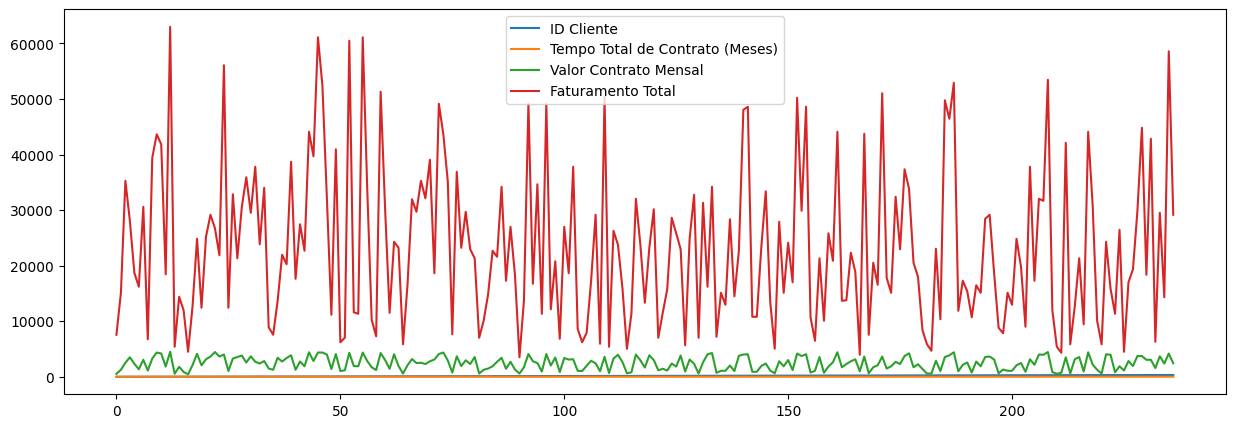

In [39]:
faturamentos_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente' ,'Valor Contrato Mensal']], on='ID Cliente')
faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']
print('Faturamento Total: R${:,}'.format(sum(faturamentos_df['Faturamento Total'])))
faturamentos_df.plot(kind="line", figsize=(15, 5))

### 3.  Qual o % de funcionários que já fechou algum contrato?<br>


In [19]:
# unique() - remove duplicatas.
qtde_funcionario_fecharamcontrato = len(servicos_df['ID Funcionário'].unique())
qtde_funcionario_total = len(funcionarios_df["ID Funcionário"])
total = qtde_funcionario_fecharamcontrato / qtde_funcionario_total
print(f"O percentual de funcionários que fecharam o contrato foi de {total:.2%} ")

O percentual de funcionários que fecharam o contrato foi de 86.84% 


### 4 - Quantidade Contratos por Área

Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64


<Axes: ylabel='count'>

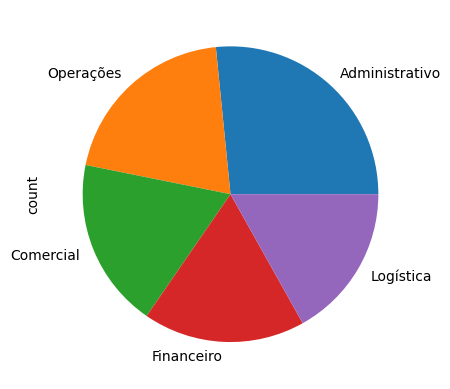

In [17]:
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
# .value_counts() - conta as ocorrências de valores únicos em uma coluna
contratos_area_qtde = contratos_area_df['Area'].value_counts()
print(contratos_area_qtde)
contratos_area_qtde.plot(kind="pie")


### 5. Calcule o total de funcionários por área

Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64

<Axes: ylabel='Area'>

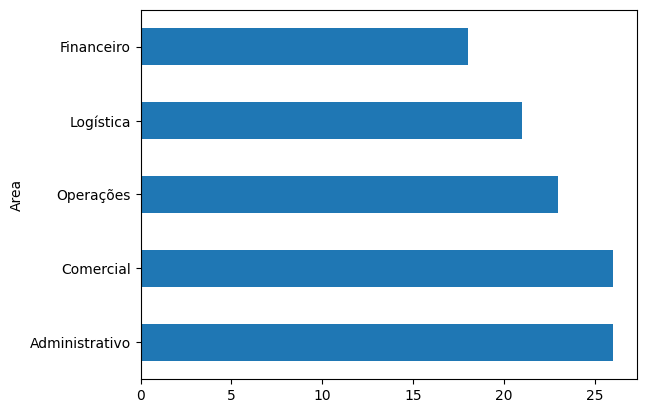

In [15]:
quantidade_funcionarios_area = funcionarios_df["Area"].value_counts()
display(quantidade_funcionarios_area)
quantidade_funcionarios_area.plot(kind="barh")

### 6. Ticket Médio Mensal

In [45]:
media_ticket = clientes_df["Valor Contrato Mensal"].mean()
print("O ticket medio mensal da empresa foi de R$ {:,.2f}".format(media_ticket))

O ticket medio mensal da empresa foi de R$ 2,502.56
